Filas promediadas: 72


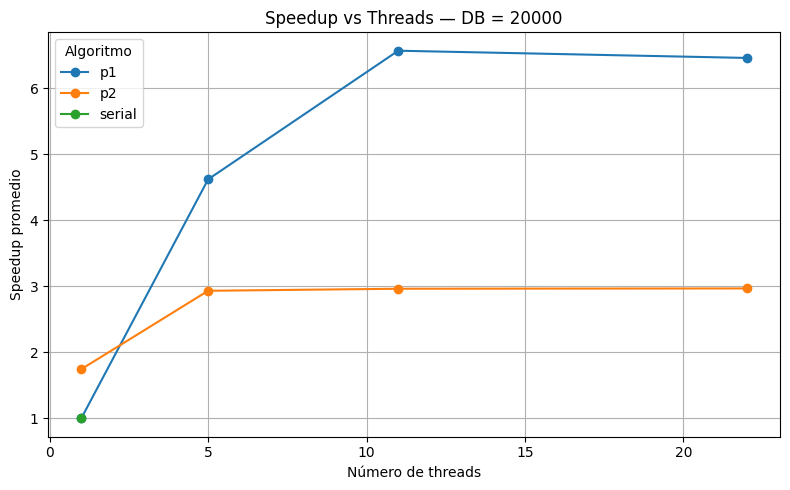

✅ Guardada: speedup_db_20000.png


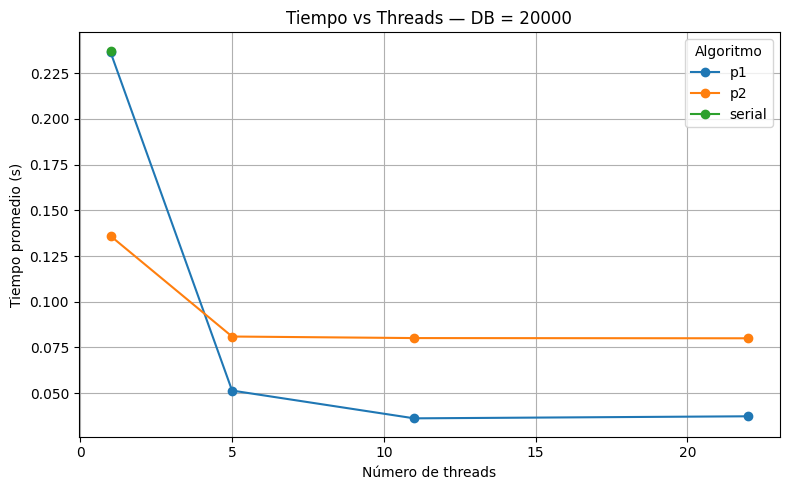

✅ Guardada: tiempo_db_20000.png


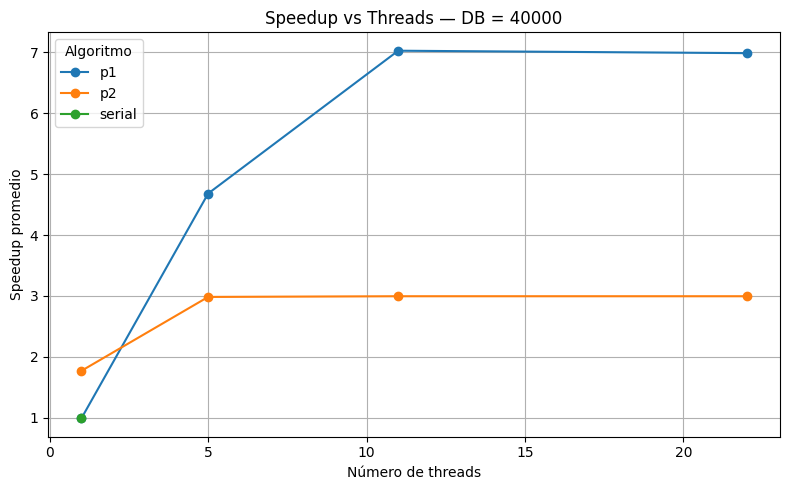

✅ Guardada: speedup_db_40000.png


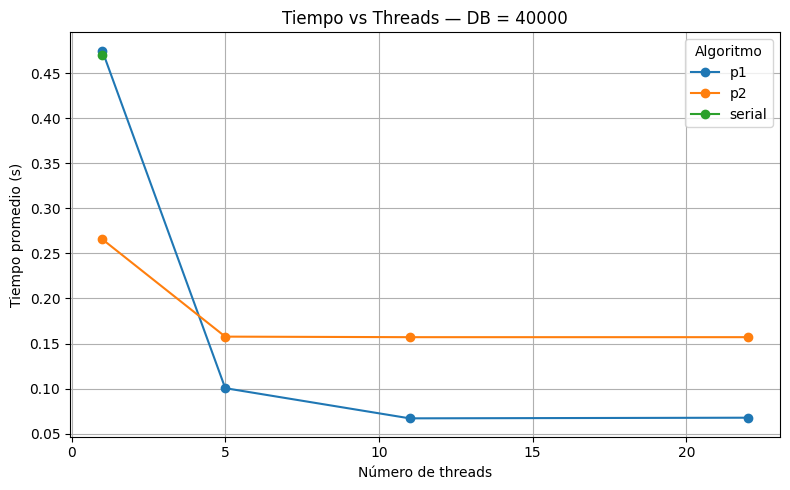

✅ Guardada: tiempo_db_40000.png


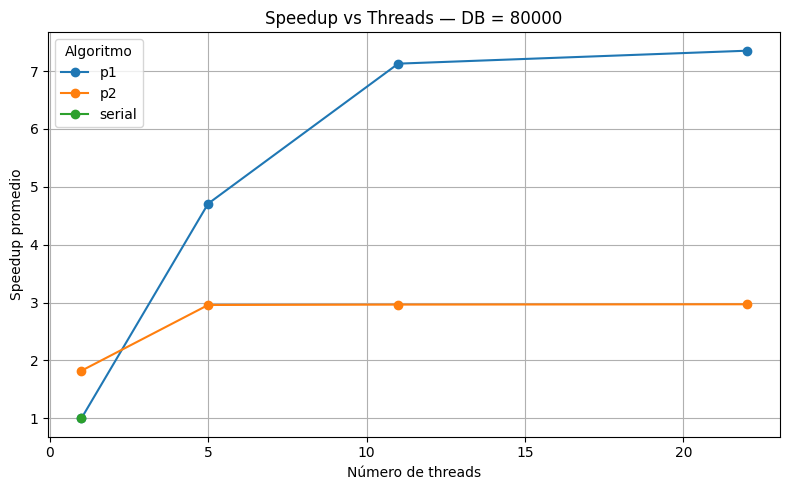

✅ Guardada: speedup_db_80000.png


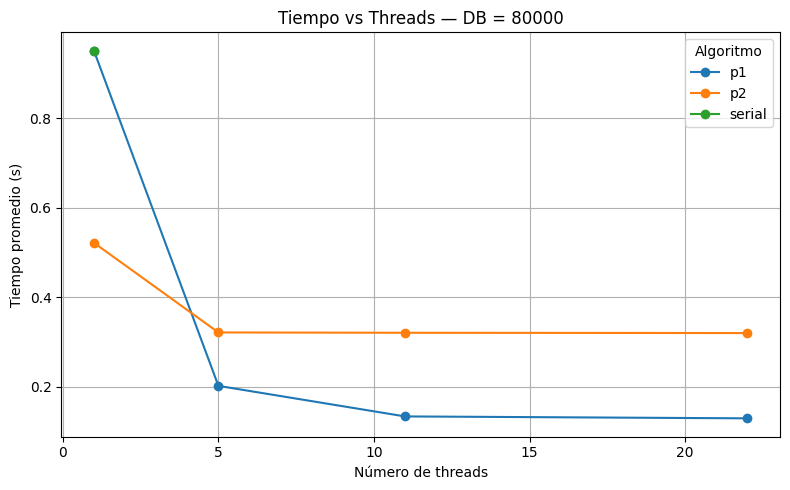

✅ Guardada: tiempo_db_80000.png


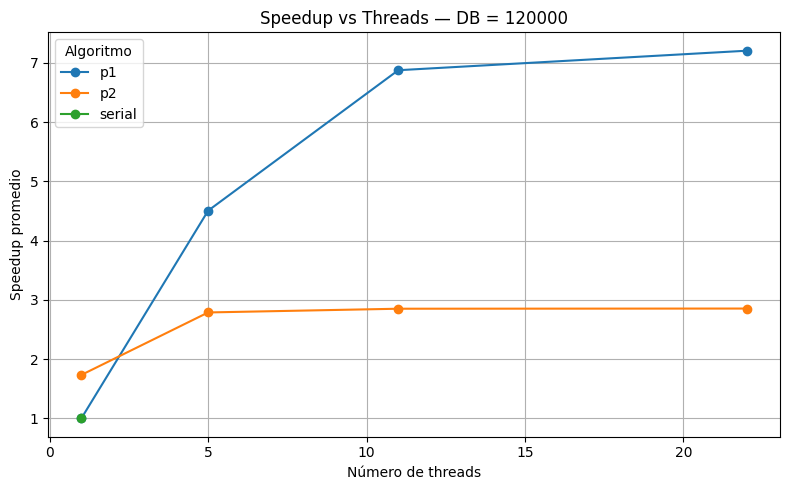

✅ Guardada: speedup_db_120000.png


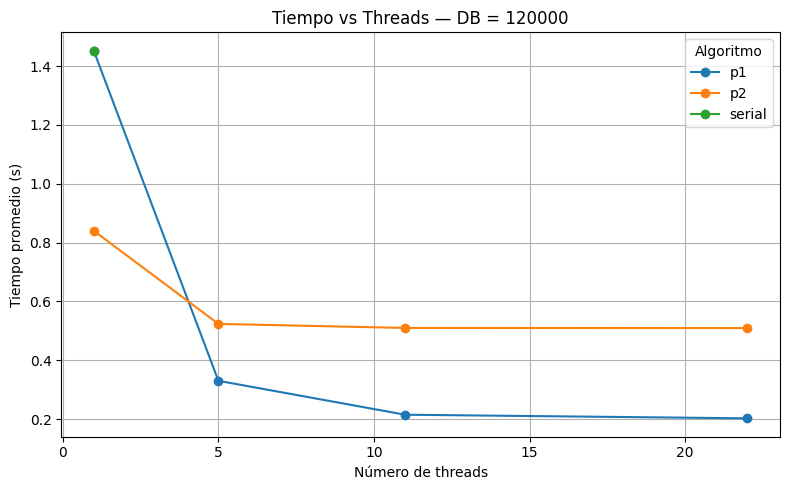

✅ Guardada: tiempo_db_120000.png


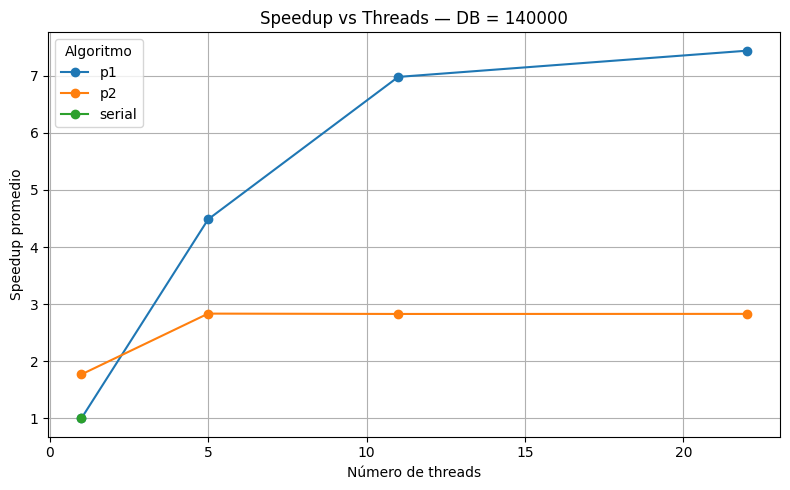

✅ Guardada: speedup_db_140000.png


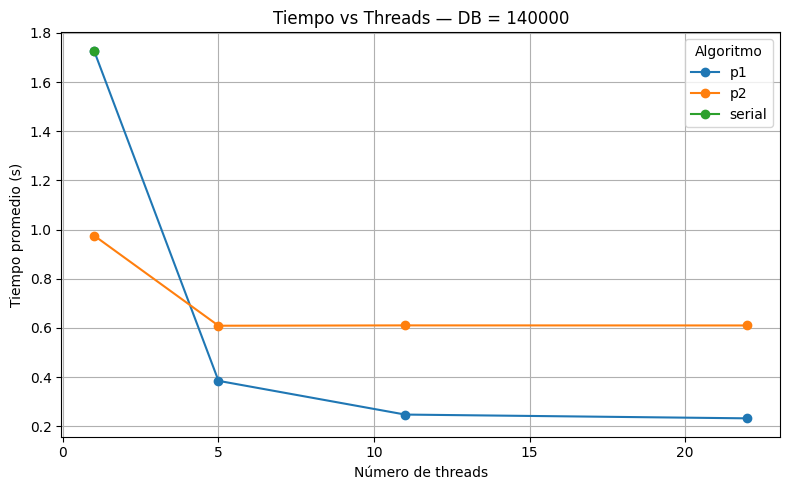

✅ Guardada: tiempo_db_140000.png


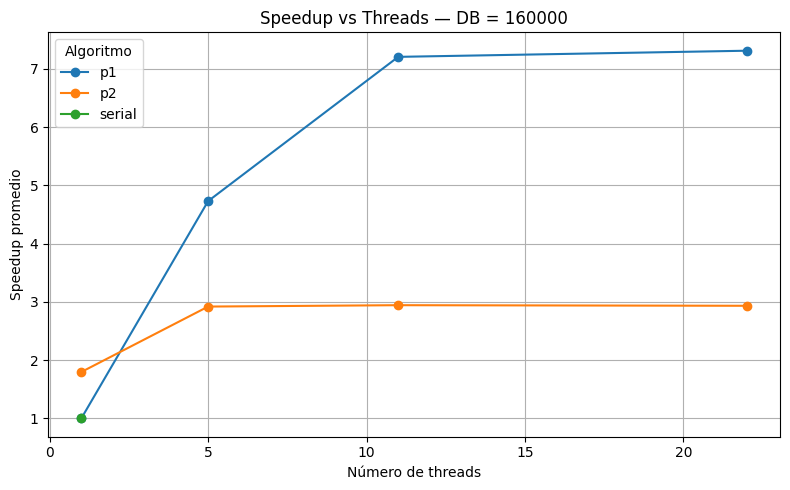

✅ Guardada: speedup_db_160000.png


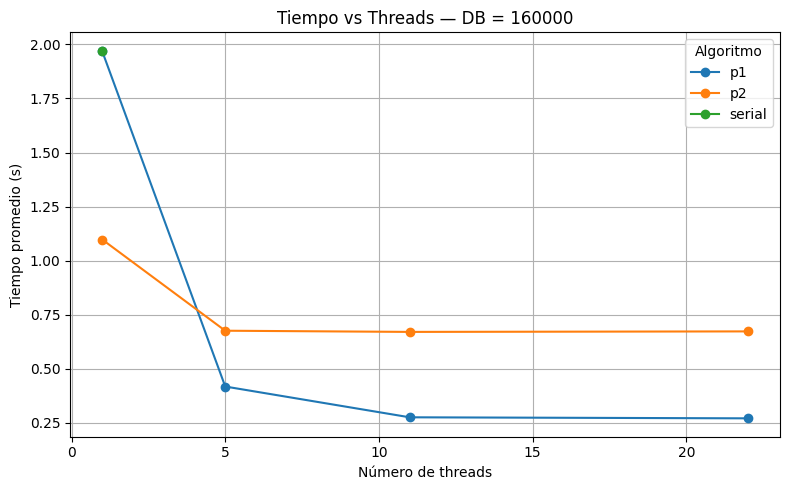

✅ Guardada: tiempo_db_160000.png


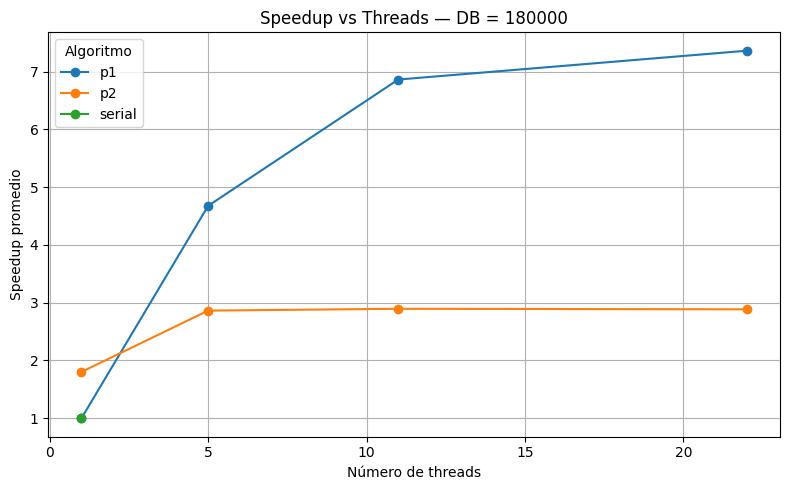

✅ Guardada: speedup_db_180000.png


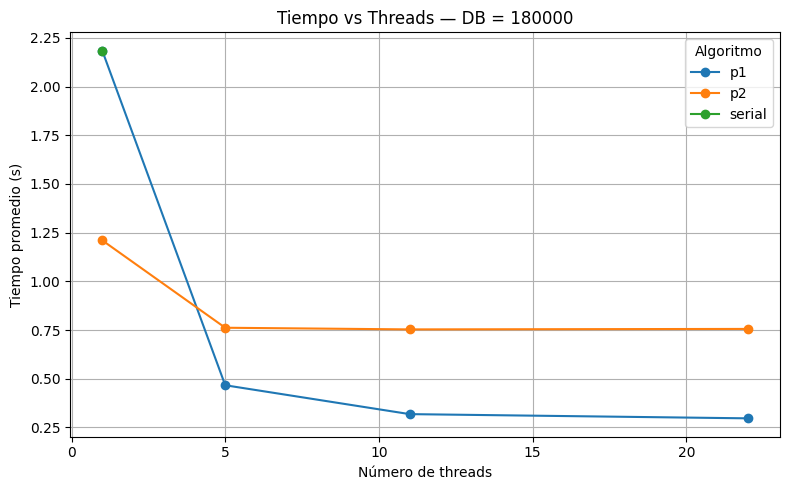

✅ Guardada: tiempo_db_180000.png


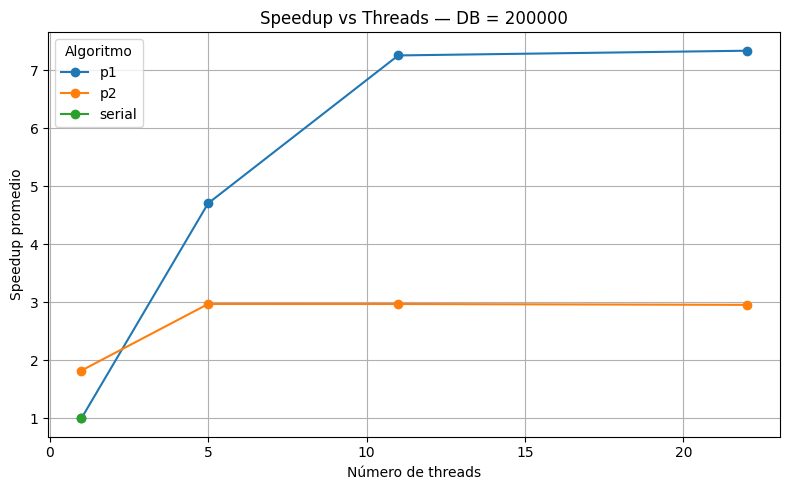

✅ Guardada: speedup_db_200000.png


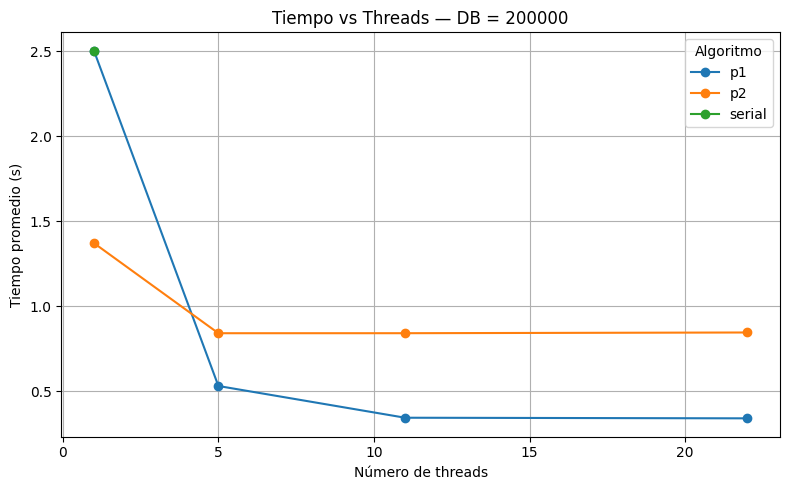

✅ Guardada: tiempo_db_200000.png


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# === 0) Configuración ===
CSV_PATH = "/Users/emiliahernandez/Desktop/comp para/resultados_benchmarks.csv"
OUT_DIR = Path(".")
OUT_DIR.mkdir(parents=True, exist_ok=True)

# === 1) Leer y normalizar columnas ===
df = pd.read_csv(CSV_PATH)
df.columns = [c.strip().lower() for c in df.columns]  # quita espacios y pone minúsculas

# Soporta dos esquemas:
# A) Separadas: db, threads, algoritmo, tiempo_s, speedup  <-- (tu caso)
# B) Combinadas: "db_threads" y/o "algoritmo_tiempo_s_speedup"

if "db" not in df.columns and "db_threads" in df.columns:
    # Formato combinado para db/threads: "20000,11"
    tmp = df["db_threads"].astype(str).str.split(",", n=1, expand=True)
    df["db"] = pd.to_numeric(tmp[0], errors="coerce")
    df["threads"] = pd.to_numeric(tmp[1], errors="coerce")

if "algoritmo" not in df.columns and "algoritmo_tiempo_s_speedup" in df.columns:
    # Formato combinado: "p1,0.1234,4.56"
    tmp = df["algoritmo_tiempo_s_speedup"].astype(str).str.split(",", n=2, expand=True)
    df["algoritmo"] = tmp[0]
    df["tiempo_s"] = pd.to_numeric(tmp[1], errors="coerce")
    df["speedup"]  = pd.to_numeric(tmp[2], errors="coerce")

# Asegura tipos numéricos y columnas mínimas
for col in ("db", "threads", "tiempo_s", "speedup"):
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

df["algoritmo"] = df["algoritmo"].astype(str)

# Limpia filas inválidas
df = df.dropna(subset=["db", "threads", "algoritmo", "tiempo_s", "speedup"])

# Convierte a int donde aplica
df["db"] = df["db"].astype(int)
df["threads"] = df["threads"].astype(int)

# === 2) Promedios por combinación (DB, threads, algoritmo) ===
df_prom = (
    df.groupby(["db", "threads", "algoritmo"], as_index=False)
      .agg(tiempo_s=("tiempo_s", "mean"),
           speedup=("speedup", "mean"))
      .sort_values(["db", "algoritmo", "threads"])
)

print("Filas promediadas:", len(df_prom))

# === 3) Graficar por cada DB: Speedup vs Threads y Tiempo vs Threads ===
for db_val in sorted(df_prom["db"].unique()):
    db_slice = df_prom[df_prom["db"] == db_val]

    # --- Speedup ---
    plt.figure(figsize=(8,5))
    for alg in db_slice["algoritmo"].unique():
        sub = db_slice[db_slice["algoritmo"] == alg]
        plt.plot(sub["threads"], sub["speedup"], marker="o", label=alg)
    plt.title(f"Speedup vs Threads — DB = {db_val}")
    plt.xlabel("Número de threads")
    plt.ylabel("Speedup promedio")
    plt.grid(True)
    plt.legend(title="Algoritmo")
    plt.tight_layout()
    out_speed = OUT_DIR / f"speedup_db_{db_val}.png"
    plt.savefig(out_speed)
    plt.show()
    print(f"✅ Guardada: {out_speed}")

    # --- Tiempo ---
    plt.figure(figsize=(8,5))
    for alg in db_slice["algoritmo"].unique():
        sub = db_slice[db_slice["algoritmo"] == alg]
        plt.plot(sub["threads"], sub["tiempo_s"], marker="o", label=alg)
    plt.title(f"Tiempo vs Threads — DB = {db_val}")
    plt.xlabel("Número de threads")
    plt.ylabel("Tiempo promedio (s)")
    plt.grid(True)
    plt.legend(title="Algoritmo")
    plt.tight_layout()
    out_time = OUT_DIR / f"tiempo_db_{db_val}.png"
    plt.savefig(out_time)
    plt.show()
    print(f"✅ Guardada: {out_time}")
